# Проект для Яндекс.Практикума
## Банки — Анализ оттока клиентов

## Материалы
* Презентация https://yadi.sk/i/eHWrq2W4OIRwdQ

## Задача

Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных
- Выделить портреты клиентов, которые склонны уходить из банка
- Сформулировать и проверить статистические гипотезы:
    - Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
    - Сформулируйте и проверьте статистическую гипотезу относительно представленных данных

## План исследования

1. Загрузка данных


2. Предобработка данных
    - изменения названия колонок
    - приведение типов данных к нужному типу
    - проверка на дубликаты
    - проверка на пропуски в данных и замена/удаление пустых значений


3. Исследовательский анализ данных, 
    - посчитать:
        - количество клиентов в разных городах
        - соотношение мужчин и женщин среди клиентов
    - провести категоризацию:
        - по возрасту
        - по доходу (зарплате)
        - по балансу на счете
        - по количеству продуктов, которыми пользуется
        - по количеству объектов в собственности


4. Формулирование и проверка гипотез
    - у тех кто ушел, баланс счета ниже чем у тех кто остался
    - те кто ушел, пользуются меньшим количеством продуктов, чем те кто остался
    - у тех кто ушел не было кредитной карты
    - те кто остались являются активными клиентами
    

5. Метрики и бизнес-показатели
    - суммарный баланс на счетах всех клиентов
    - процент ушедших клиентов
    - процент активных клиентов
    - процент клиентов с кредитной картой


6. Выводы
    - портрет лояльного клиента
    - портрет клиента с риском оттока
    

7. Рекомендации по удержанию клиентов

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import cmath as cmth

import warnings
warnings.filterwarnings("ignore")

## 1. Загрузка данных

In [2]:
users = pd.read_csv('bank_dataset.csv')
users

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## 2. Предобработка данных

In [3]:
# Приведем названия колонок к нижнему регистру
users.columns = users.columns.str.lower()

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# Приведем колонку данных пол в тип категория
users['gender'] = users['gender'].astype('category')

Типы данных в датасете корректны.
В целях оптимизации памяти можно привести колонку пол в тип данных категория.

In [6]:
# Проверим на дубликаты
users.duplicated().mean()

0.0

Дубликатов в датасете не выявлено

In [7]:
# Проверим колонки на пропущенные значения
users.isna().mean()

userid              0.0000
score               0.0000
city                0.0000
gender              0.0000
age                 0.0000
objects             0.0000
balance             0.3617
products            0.0000
creditcard          0.0000
loyalty             0.0000
estimated_salary    0.0000
churn               0.0000
dtype: float64

Выявлены пропущенные значения в колонке "баланс", их количество составляет 36% от общего.

In [8]:
users[users['balance'].isna()]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [9]:
users['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Я хочу проверить, есть ли какие-нибудь особенности в пропущенных значениях баланса у активных и ушедших клиентов.

In [10]:
# Сформируем таблицы активных и ушедших клиентов, где есть пропущенные значения
churn_users = users[users['churn'] == 1]
active_users = users[users['churn'] == 0]

In [11]:
print('Статистика балансов у ушедших клиентов:')
print('среднее значение:', churn_users['balance'].mean())
print('медиана:', churn_users['balance'].median())

Статистика балансов у ушедших клиентов:
среднее значение: 120746.97113207541
медиана: 119948.09


In [12]:
print('Статистика балансов у активных клиентов:')
print('среднее значение:', active_users['balance'].mean())
print('медиана:', active_users['balance'].median())

Статистика балансов у активных клиентов:
среднее значение: 119535.8642695002
медиана: 119791.215


In [13]:
print('Статистика общая:')
print('среднее значение:', users['balance'].mean())
print('медиана:', users['balance'].median())

Статистика общая:
среднее значение: 119827.49379288674
медиана: 119839.69


In [14]:
print('Пропущенные значения у ушедших клиентов:', churn_users['balance'].isna().mean())
print('Пропущенные значения у активных клиентов:', active_users['balance'].isna().mean())

Пропущенные значения у ушедших клиентов: 0.24545900834560627
Пропущенные значения у активных клиентов: 0.39143538867261085


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   userid            10000 non-null  int64   
 1   score             10000 non-null  int64   
 2   city              10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   objects           10000 non-null  int64   
 6   balance           6383 non-null   float64 
 7   products          10000 non-null  int64   
 8   creditcard        10000 non-null  int64   
 9   loyalty           10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 869.4+ KB


### Выводы по загрузке и предобработке данных
- Данные загружены (в таблице 10000 записей в 12 колонках)
- Типы данных в датасете корректны, в целях оптимизации памяти привел колонку "пол" в тип данных категория
- Дубликатов в датасете не выявлено
- Выявлены пропущенные значения в колонке "баланс", их количество составляло 36% от общего
- Особенностей в пропущенных значениях баланса у активных и ушедших клиентов не выявлено
- По пропущенным значениям баланса принято решение оставить все как есть

## 3. Исследовательский анализ данных

### Количество клиентов в разных городах

In [16]:
# Сформируем группы клиентов ушедших и оставшихся
churn_group = users[users['churn'] == 1]
stay_group = users[users['churn'] != 1]

In [17]:
# Посчитаем количество клиентов в разных городах
users.groupby('city')['userid'].count()

city
Ростов Великий    2509
Рыбинск           2477
Ярославль         5014
Name: userid, dtype: int64

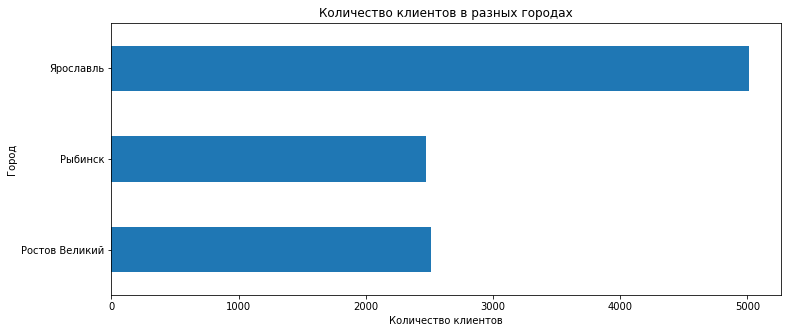

In [18]:
# Построим график
plt.figure(figsize = (12,5))
users.groupby('city')['userid'].count().plot(kind = 'barh',
                                            title = 'Количество клиентов в разных городах')

plt.xlabel('Количество клиентов')
plt.ylabel('Город')
plt.show()

Больше всего клиентов в Ярославле, в Рыбинске и Ростове примерно поровну. В сумме в Ростове и в Рыбинске клиентов примерно столько же, сколько в Ярославле.

In [19]:
# Посчитаем количество клиентов разных городах в разбивке ушло-осталось
gr_cities = users.groupby(['city', 'churn'])['userid'].count().to_frame()
gr_cities = gr_cities.reset_index()
gr_cities

,city,churn,userid
0,Ростов Великий,0,1695
1,Ростов Великий,1,814
2,Рыбинск,0,2064
3,Рыбинск,1,413
4,Ярославль,0,4204
5,Ярославль,1,810


In [20]:
# Преобразуем таблицу
pivot_cities = gr_cities.pivot(
index = 'city',
columns = 'churn',
values = 'userid')
pivot_cities

churn,0,1
city,,
Ростов Великий,1695,814
Рыбинск,2064,413
Ярославль,4204,810


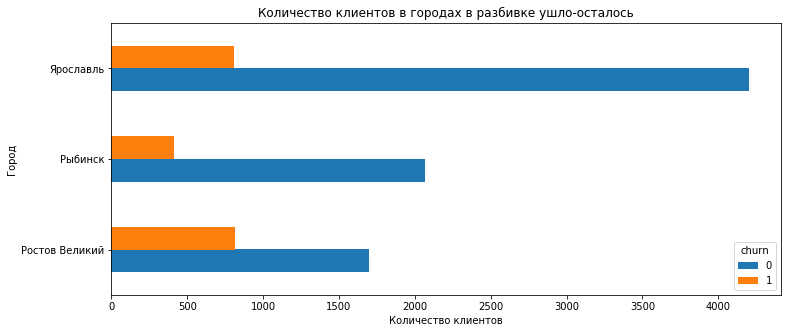

In [21]:
# Построим график количества клиентов в городах в разбивке ушло-осталось
pivot_cities.plot(kind = 'barh', title = "Количество клиентов в городах в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Город')

plt.show()

В Ростове больше всего процент ушедших клиентов, надо на это обратить внимание. Возможно что-то не так с обслуживанием в Ростовском филиале.

### Количество мужчин и женщин

In [22]:
# Посчитаем соотношение мужчин и женщин среди клиентов c делением на тех кто ушел и кто остался
gr_genders = users.groupby(['gender', 'churn'])['userid'].count().to_frame()
gr_genders = gr_genders.reset_index()

pivot_genders = gr_genders.pivot(
index = 'gender',
columns = 'churn',
values = 'userid')

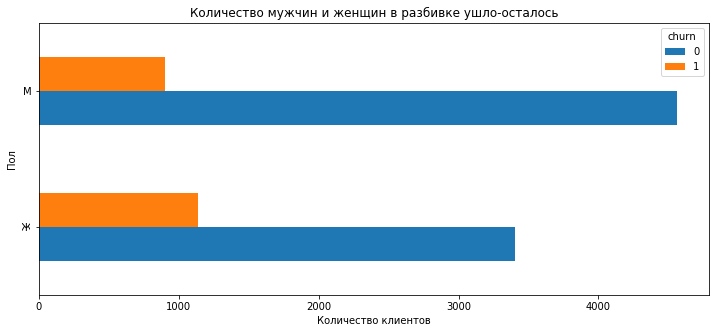

In [23]:
# Построим график количества мужчин и женщин в разбивке ушло-осталось
pivot_genders.plot(kind = 'barh', title = "Количество мужчин и женщин в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Пол')

plt.show()

In [24]:
# Добавим в таблицу колонку с процентным изменением
pivot_genders['%'] = pivot_genders[1] / pivot_genders[0]
pivot_genders

churn,0,1,%
gender,,,
Ж,3404,1139,0.334606
М,4559,898,0.196973


Женщин ушло больше чем мужчин (33% против 20%)

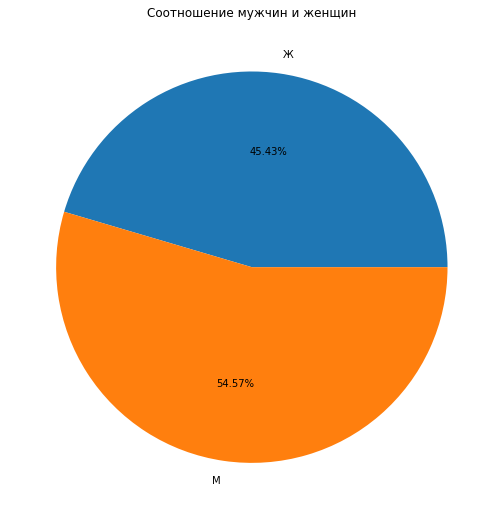

In [25]:
# Построим круговую диаграмму соотношения клиентов мужчин и женщин
plt.figure(figsize = (9,9))
users.groupby('gender')['userid'].count().plot(kind = 'pie',
                                              title = 'Соотношение мужчин и женщин', autopct='%.2f%%')
plt.ylabel('')
plt.show()

Мужчин примерно на 10% больше чем женщин.

### Категоризация по возрасту

In [26]:
# Функция категоризации по возрасту
def group_age(row):
    if row < 30:
        return '<30'
    elif row >=30 and row < 40:
        return '30-40'
    elif row >= 40 and row < 50:
        return '40-50'
    elif row >= 50 and row < 65:
        return '50-65'
    return '65+'

In [27]:
# Посмотрим на перцентили распределения возраста клиентов
users['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [28]:
# Применим функцию
users['age_group'] = users['age'].apply(group_age)

In [29]:
# Посчитаем количество клиентов в разных возрастных категориях
users.groupby('age_group')['userid'].count()

age_group
30-40    4346
40-50    2618
50-65    1113
65+       282
<30      1641
Name: userid, dtype: int64

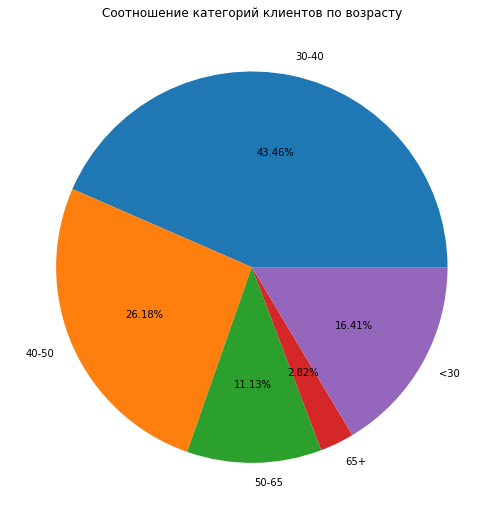

In [30]:
# Построим круговую диаграмму категорий клиентов по возрасту
plt.figure(figsize = (9,9))
users.groupby('age_group')['userid'].count().plot(kind = 'pie',
                                              title = 'Соотношение категорий клиентов по возрасту', autopct='%.2f%%')
plt.ylabel('')
plt.show()

Клиенты банка делятся на следующие возрастные категории:

- 30-40 (34%)
- 40-50 (26%)
- до 30 (16%)
- 50-65 (11%)
- старше 65 (3%)
    
Самая большая группа: 30-40 лет

In [31]:
# Посчитаем количество клиентов в разных возрастных категориях c разбивкой ушло-осталось
gr_age = users.groupby(['age_group', 'churn'])['userid'].count().to_frame()
gr_age = gr_age.reset_index()

pivot_age = gr_age.pivot(
index = 'age_group',
columns = 'churn',
values = 'userid')

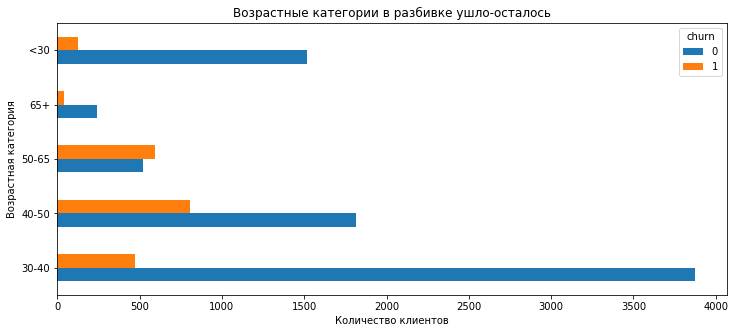

In [32]:
# Построим график возрастных категорий в разбивке ушло-осталось
pivot_age.plot(kind = 'barh', title = "Возрастные категории в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Возрастная категория')

plt.show()

In [33]:
# Добавим колонку с процентным изменением
pivot_age['%'] = pivot_age[1] / pivot_age[0]
pivot_age.sort_values(by = '%', ascending = False)

churn,0,1,%
age_group,,,
50-65,522,591,1.132184
40-50,1812,806,0.444812
65+,239,43,0.179916
30-40,3873,473,0.122128
<30,1517,124,0.081740


Больше всего отток в категориях:
- 50-65 (там ушло больше чем осталось -113%)
- 40-50 (-44%)

### Категоризация по зарплате

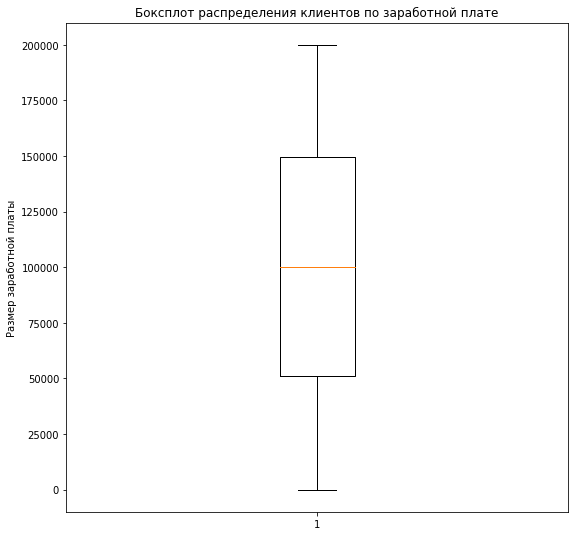

In [34]:
# Построим боксплот распределения клиентов по заработной плате
plt.figure(figsize = (9,9))
plt.boxplot(users['estimated_salary'])
plt.title('Боксплот распределения клиентов по заработной плате')
plt.ylabel('Размер заработной платы')
plt.show()

In [35]:
# Функция категоризации по зарплате
def group_salary(row):
    if row < 50000:
        return 'до 50 тыс. рублей'
    elif row >=50000 and row < 100000:
        return '50 - 100 тыс. рублей'
    elif row >=100000 and row < 150000:
        return '100 - 150 тыс. рублей'
    return 'больше 150 тыс. рублей'

In [36]:
# Посмотрим перцентили распределения заработной платы
users['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

In [37]:
# Применим функцию категоризации
users['salary_group'] = users['estimated_salary'].apply(group_salary)

In [38]:
# Посчитаем количество клиентов в разных зарплаттных категориях
users.groupby('salary_group')['userid'].count()

salary_group
100 - 150 тыс. рублей     2555
50 - 100 тыс. рублей      2537
больше 150 тыс. рублей    2455
до 50 тыс. рублей         2453
Name: userid, dtype: int64

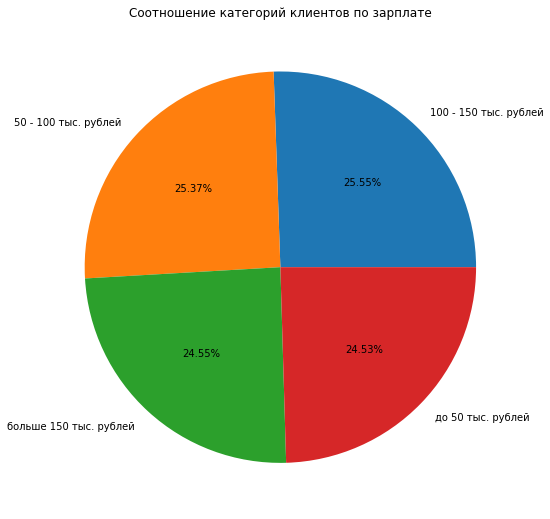

In [39]:
# Построим круговую диаграмму соотношения категорий клиентов по зарплате
plt.figure(figsize = (9,9))
users.groupby('salary_group')['userid'].count().plot(kind = 'pie',
                                              title = 'Соотношение категорий клиентов по зарплате', autopct='%.2f%%')
plt.ylabel('')
plt.show()

Всех категорий по заработной плате у нас поровну, примерно по 25%

In [40]:
# Посчитаем количество клиентов в разных категориях заработной платы c разбивкой ушло-осталось
gr_salary = users.groupby(['salary_group', 'churn'])['userid'].count().to_frame()
gr_salary = gr_salary.reset_index()

pivot_salary = gr_salary.pivot(
index = 'salary_group',
columns = 'churn',
values = 'userid')

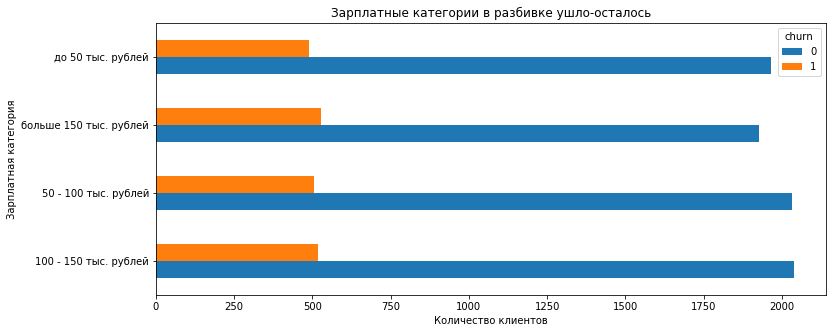

In [41]:
# Построим график зарплатных категорий с разбивкой ушло-осталось
pivot_salary.plot(kind = 'barh', title = "Зарплатные категории в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Зарплатная категория')

plt.show()

Во всех зарплатных категориях отток одинаковый.

### Категоризация клиентов по остатку на счете

In [42]:
# Отсортируем только клиентов с балансом на счете
gb_users = users[users['balance'].notna()]

In [43]:
# Функция категоризации по балансу
def group_balance(row):
    if row < 50000:
        return 'до 50 000'
    elif row >=50000 and row < 100000:
        return '50 000 - 99 000'
    elif row >=100000 and row < 150000:
        return '100 000 - 149 999'
    elif row >=150000 and row < 200000:
        return '150 000 - 199 999'    
    return 'больше 200 000'

In [44]:
# Применим функцию категоризации
gb_users['balance_group'] = gb_users['balance'].apply(group_balance)

In [45]:
# Посчитаем количество клиентов в категориях по балансу
balance_grouped_users = gb_users.groupby('balance_group')['userid'].count()
balance_grouped_users.sort_values(ascending = False)

balance_group
100 000 - 149 999    3830
50 000 - 99 000      1509
150 000 - 199 999     935
до 50 000              75
больше 200 000         34
Name: userid, dtype: int64

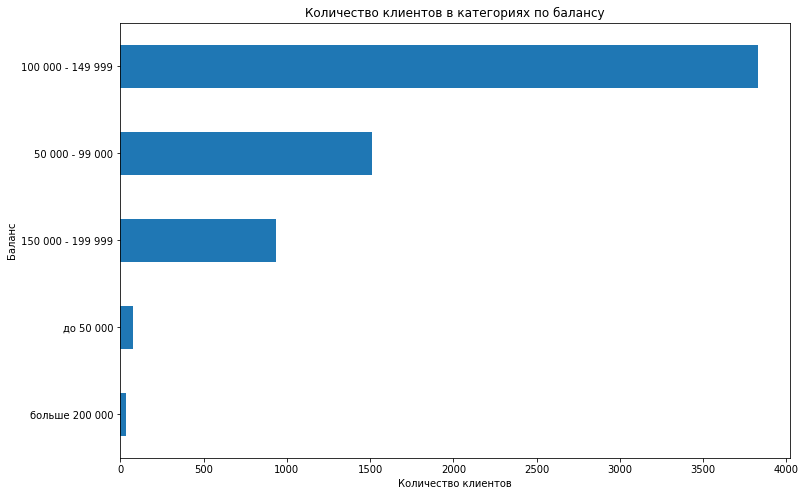

In [46]:
# Построим график количества клиентов в категориях по балансу
plt.figure(figsize = (12,8))
balance_grouped_users.sort_values().plot(kind = 'barh',
                                        title = 'Количество клиентов в категориях по балансу')

plt.xlabel('Количество клиентов')
plt.ylabel('Баланс')
plt.show()

Основная масса клиентов имеет баланс на счете от 100 тыс. рублей до 150 тыс. рублей. До 50 тыс. и больше 200 тыс. - совсем мало.

In [47]:
# Посчитаем количество клиентов в разных категориях по балансу в разбивке ушло-осталось
gr_balance = gb_users.groupby(['balance_group', 'churn'])['userid'].count().to_frame()
gr_balance = gr_balance.reset_index()

pivot_balance = gr_balance.pivot(
index = 'balance_group',
columns = 'churn',
values = 'userid')

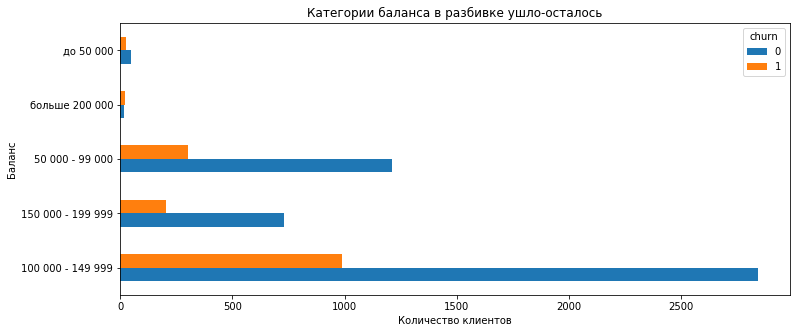

In [48]:
# Построим график количества клиентов в категориях по балансу в разбивке ушло-осталось
pivot_balance.plot(kind = 'barh', title = "Категории баланса в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Баланс')

plt.show()

In [49]:
# Добавим колонку с процентным изменением
pivot_balance['%'] = pivot_balance[1] / pivot_balance[0]
pivot_balance.sort_values(by = '%', ascending = False)

churn,0,1,%
balance_group,,,
больше 200 000,15,19,1.266667
до 50 000,49,26,0.530612
100 000 - 149 999,2843,987,0.347168
150 000 - 199 999,730,205,0.280822
50 000 - 99 000,1209,300,0.248139


Категория клиентов с балансом больше 200 тыс. самая немногочисленная, но из нее ушел наибольший процент клиентов. Далее клиенты с остатком на счете до 50 тыс., ушло 53%. В оставшихся категориях процент оттока около 30%

### Категоризация клиентов по количеству продуктов, которыми пользуются

In [50]:
# Посчитаем сколько клиентов каким количеством продуктов пользуются
users['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

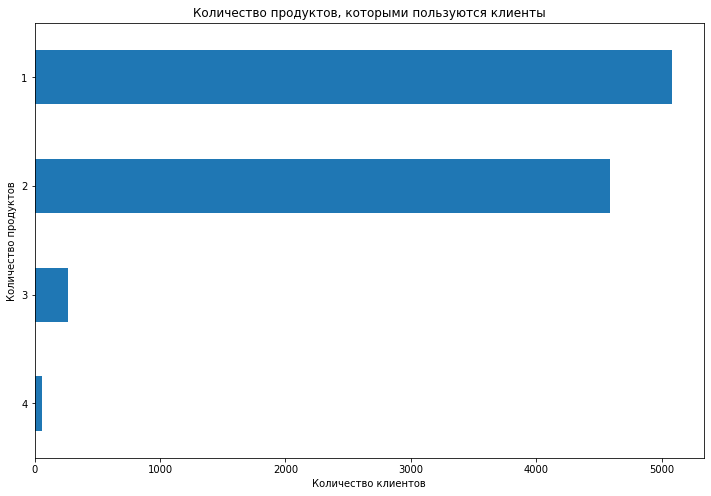

In [51]:
# Построим график
plt.figure(figsize = (12,8))
users['products'].value_counts(ascending = True).plot(kind = 'barh',
                                                     title = 'Количество продуктов, которыми пользуются клиенты')
plt.xlabel('Количество клиентов')
plt.ylabel('Количество продуктов')
plt.show()

In [52]:
# Посчитаем процент клиентов пользующихся разным количеством продуктов
users['products'].value_counts(normalize = True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: products, dtype: float64

Основная масса клиентов пользуются одним или двумя продуктами (51% и 46% соответственно). Тех кто пользуется тремя или четырмя продуктами совсем мало (3% и меньше 1% соответственно).

In [53]:
# Посчитаем количество клиентов пользующихся различным количеством продуктов c разбивкой ушло-осталось
gr_products = users.groupby(['products', 'churn'])['userid'].count().to_frame()
gr_products = gr_products.reset_index()

pivot_products = gr_products.pivot(
index = 'products',
columns = 'churn',
values = 'userid')

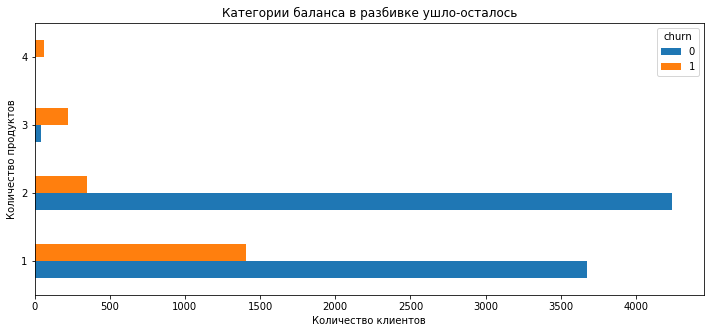

In [54]:
# Построим график количества клиентов пользующихся различным количеством продуктов c разбивкой ушло-осталось
pivot_products.plot(kind = 'barh', title = "Категории баланса в разбивке ушло-осталось", figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Количество продуктов')

plt.show()

In [55]:
# Добавим колонку с процентным изменением
pivot_products['%'] = pivot_products[1] / pivot_products[0]
pivot_products.sort_values(by = '%', ascending = False)

churn,0,1,%
products,,,
3,46.0,220.0,4.782609
1,3675.0,1409.0,0.383401
2,4242.0,348.0,0.082037
4,NaN,60.0,NaN


Больше всего ушло клиентов из тех кто пользовался 3 и 4 продуктами. В этих категориях клиентов ушло больше чем осталось.

### Категоризация клиентов по количеству объектов в собственности

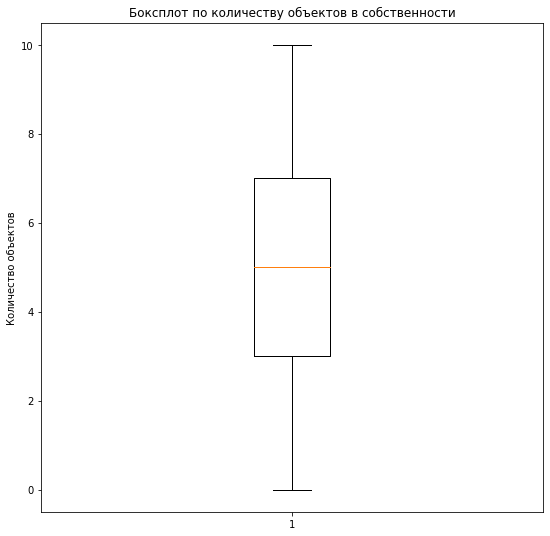

In [56]:
# Построим боксплот по количеству объектов в собственности
plt.figure(figsize = (9, 9))
plt.boxplot(users['objects'])
plt.title('Боксплот по количеству объектов в собственности')
plt.ylabel('Количество объектов')
plt.show()

In [57]:
# Функция категоризации по количеству объектов в собственности
def group_objects(row):
    if row <= 2:
        return '0-2'
    elif row > 2 and row <= 5:
        return '3 - 5'
    return 'больше 5'

In [58]:
# Применим функцию категоризации
users['objects_group'] = users['objects'].apply(group_objects)

In [59]:
# Посчитаем количество клиентов в разных категориях
users['objects_group'].value_counts()

больше 5    4494
3 - 5       3010
0-2         2496
Name: objects_group, dtype: int64

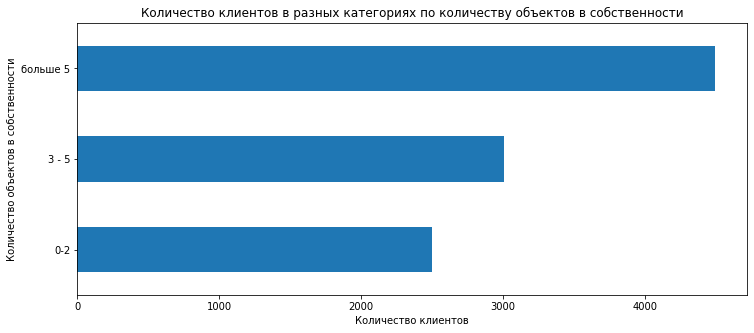

In [60]:
# Построим график количества клиентов в разных категориях по количеству объектов в собственности
plt.figure(figsize = (12,5))
users['objects_group'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Количество клиентов в разных категориях по количеству объектов в собственности')
plt.xlabel('Количество клиентов')
plt.ylabel('Количество объектов в собственности')
plt.show()

In [61]:
# Посмотрим процентную разбивку по категориям
users['objects_group'].value_counts(normalize = True)

больше 5    0.4494
3 - 5       0.3010
0-2         0.2496
Name: objects_group, dtype: float64

Среди наших клиентов большинство (44%) имеет больше 5 объектов в собственности, У 30% от 3-х до 5-ти объектов. У нас явно данные о вип клиентах.

In [62]:
# Посчитаем количество клиентов пользующихся различным количеством продуктов c разбивкой ушло-осталось
gr_objects = users.groupby(['objects_group', 'churn'])['userid'].count().to_frame()
gr_objects = gr_objects.reset_index()

pivot_objects = gr_objects.pivot(
index = 'objects_group',
columns = 'churn',
values = 'userid')

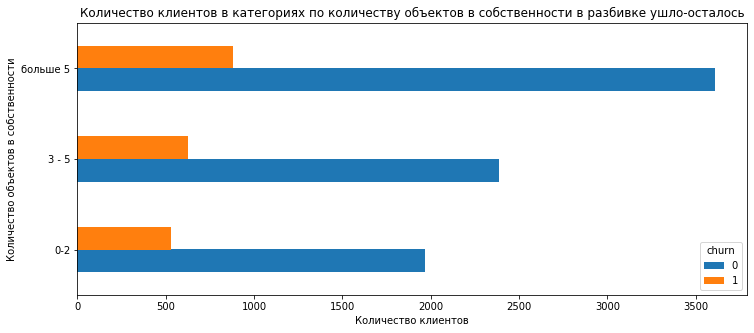

In [63]:
# Построим график 
pivot_objects.plot(
    kind = 'barh', 
    title = "Количество клиентов в категориях по количеству объектов в собственности в разбивке ушло-осталось", 
    figsize = (12,5))
plt.xlabel('Количество клиентов')
plt.ylabel('Количество объектов в собственности')

plt.show()

In [64]:
# Добавим колонку с процентным изменением
pivot_objects['%'] = pivot_objects[1] / pivot_objects[0]
pivot_objects.sort_values(by = '%', ascending = False)

churn,0,1,%
objects_group,,,
0-2,1968,528,0.268293
3 - 5,2385,625,0.262055
больше 5,3610,884,0.244875


Процент оттока во всех категориях по количеству объектов в собственности одинаков

### Выводы по исследовательскому анализу данных
- Больше всего клиентов в Ярославле, в Рыбинске и Ростове примерно поровну. В сумме в Ростове и в Рыбинске клиентов примерно столько же, сколько в Ярославле
- Мужчин примерно на 10% больше чем женщин
- Клиенты банка делятся на следующие возрастные категории:
    - 30-40 (34%)
    - 40-50 (26%)
    - до 30 (16%)
    - 50-65 (11%)
    - старше 65 (3%)
- Самая большая группа: 30-40 лет
- Основная масса клиентов имеет баланс на счете от 100 тыс. рублей до 150 тыс. рублей. До 50 тыс. и больше 200 тыс. - совсем мало
- Основная масса клиентов пользуются одним или двумя продуктами (51% и 46% соответственно). Тех кто пользуется тремя или четырмя продуктами совсем мало (3% и меньше 1% соответственно)
- Среди наших клиентов большинство (44%) имеет больше 5 объектов в собственности, У 30% от 3-х до 5-ти объектов. У нас явно данные о вип клиентах
- В Ростове больше всего процент ушедших клиентов, надо на это обратить внимание. Возможно что-то не так с обслуживанием в Ростовском филиале.
- Женщин ушло больше чем мужчин (30% против 20%)
- Самая большая группа клиентов: 30-40 лет
- Больше всего отток в категориях:
	- 50-65 (там ушло больше чем осталось -113%)
	- 40-50 (-44%)
- Всех категорий по заработной плате у нас поровну, примерно по 25%
- Во всех зарплатных категориях процент оттока одинаковый
- Категория клиентов с балансом больше 200 тыс. самая немногочисленная, но из нее ушел наибольший процент клиентов. Далее клиенты с остатком на счете до 50 тыс., ушло 53%. В оставшихся категориях процент оттока около 30%
- Больше всего ушло клиентов из тех кто пользовался 3 и 4 продуктами. В этих категориях клиентов ушло даже больше чем осталось
- Процент оттока во всех категориях по количеству объектов в собственности одинаков

## 4. Формулирование и проверка гипотез

### У тех кто ушел, баланс счета ниже чем у тех кто остался

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза Н0 - Средний баланс счета у ушедших клиентов равен среднему балансу счета у оставшихся
- Альтернативная гипотеза Н1 - Средний баланс счета у ушедших и оставшихся клиентов не равны

In [65]:
# Сформируем группы только из клиентов с ненулевым балансом
gb_churn_group = churn_group[churn_group['balance'].notna()]
gb_stay_group = stay_group[stay_group['balance'].notna()]

In [66]:
# Проверим выборки критерием Манна-Уитни и посчитаем относительную разницу среднего баланса тех кто остался
print("p-value: {0:.3f}".format(stats.mannwhitneyu(gb_churn_group['balance'], 
                                          gb_stay_group['balance'])[1]))


print("Относительная разница: {0:.3f}".format(gb_stay_group['balance']\
                                                            .mean()/gb_churn_group['balance'].mean() - 1))

p-value: 0.111
Относительная разница: -0.010


P-value > 0.05, Значит нулевую гипотезу о равенстве среднего баланса в группах не удалось опровергнуть.

Разница средних балансов в группах меньше 1%.

### Те кто ушел, пользуются меньшим количеством продуктов, чем те кто остался

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза Н0 - Среднее количество продуктов у ушедших клиентов равно среднему количеству продуктов у оставшихся
- Альтернативная гипотеза Н1 - Среднее количество продуктов у ушедших и оставшихся клиентов не равны

In [67]:
# Проверим выборки критерием Манна-Уитни и посчитаем относительную разницу среднего баланса тех кто остался
print("p-value: {0:.3f}".format(stats.mannwhitneyu(churn_group['products'], 
                                          stay_group['products'])[1]))


print("Относительная разница: {0:.3f}".format(stay_group['products'].mean()/churn_group['products'].mean() - 1))

p-value: 0.000
Относительная разница: 0.047


P-value < 0.05, Значит нулевая гипотеза о равенстве среднего количества продуктов клиентов в группах не подтверждена.

Разница среднего количества активных клиентов в группе оставшихся клиентов составляет 5%.

### У тех кто ушел не было кредитной карты

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза Н0 - Доля клиентов с кредитными картами среди ушедших клиентов равна доле клиентов с кредитными картами в группе оставшихся
- Альтернативная гипотеза Н1 - Доли клиентов с кредитными картами в группах ушедших и оставшихся клиентов не равны

In [68]:
# Определим переменные sucesses и trials
successes_1 = len(churn_group[churn_group['creditcard'] == 1])
trials_1 = len(churn_group)
print(successes_1, trials_1)

1424 2037


In [69]:
successes_2 = len(stay_group[stay_group['creditcard'] == 1])
trials_2 = len(stay_group)
print(successes_2, trials_2)

5631 7963


In [70]:
# Напишем функцию для проверки гипотез
def z_test(successes_1, trials_1, successes_2, trials_2):
    # Критический уровень статистической значимости
    alpha = .05

    #successes = np.array([2450, 2476])
    #trials = np.array([2483, 2512])

    # Пропорция успехов в А1
    p1 = successes_1 / trials_1

    # Пропорция успехов в А2
    p2 = successes_2 / trials_2

    # Пропорция успехов в A1 + A2
    p_combined = (successes_1 + successes_2) / (trials_1 + trials_2)

    # Разница пропорций
    difference = p1 - p2

    # Cчитаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / cmth.sqrt(p_combined * (1 - p_combined) * (1 / trials_1 + 1 / trials_2))

    # Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница, p-value:', p_value)
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными, p-value:', p_value)

In [71]:
# Вызовем функцию проверки гипотезы z-критерием
z_test(successes_1, trials_1, successes_2, trials_2)

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными, p-value: 0.4753653559706539


### Те кто остались являются активными клиентами

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза Н0 - Доля активных клиентов среди ушедших клиентов равна доле активных клиентов в группе оставшихся
- Альтернативная гипотеза Н1 - Доли активных клиентов в группах ушедших и оставшихся клиентов не равны

In [72]:
# Определим переменные sucesses и trials
successes_1 = len(churn_group[churn_group['loyalty'] == 1])
trials_1 = len(churn_group)
print(successes_1, trials_1)

735 2037


In [73]:
successes_2 = len(stay_group[stay_group['loyalty'] == 1])
trials_2 = len(stay_group)
print(successes_2, trials_2)

4416 7963


In [74]:
# Вызовем функцию проверки гипотезы z-критерием
z_test(successes_1, trials_1, successes_2, trials_2)

Отвергаем нулевую гипотезу: между долями есть значимая разница, p-value: 0.0


## Выводы по проверке гипотез
- Не удалось опровергнуть гипотезы:
    - Средний баланс счета у ушедших клиентов равен среднему балансу счета у оставшихся
    - Доля клиентов с кредитными картами среди ушедших клиентов равна доле клиентов с кредитными картами в группе оставшихся


- Не удалось подтвердить гипотезы:
    - Среднее количество продуктов у ушедших клиентов равно среднему количеству продуктов у оставшихся
    - Доля активных клиентов среди ушедших клиентов равна доле активных клиентов в группе оставшихся
    
Таким образом, признаками, по которым можно прогнозировать отток клиентов могут являться:
- количество продуктов
- активность

## 5. Метрики и бизнес-показатели

### Cуммарный баланс на счетах всех клиентов

In [75]:
print('Суммарный баланс на счетах всех клиентов:', users['balance'].sum(), 'рублей.')

Суммарный баланс на счетах всех клиентов: 764858892.8800001 рублей.


In [76]:
# Можно также посчитать баланс клиентов которые ушли
print('Суммарный баланс на счетах ушедших клиентов:', churn_group['balance'].sum(), 'рублей.')

Суммарный баланс на счетах ушедших клиентов: 185588094.63 рублей.


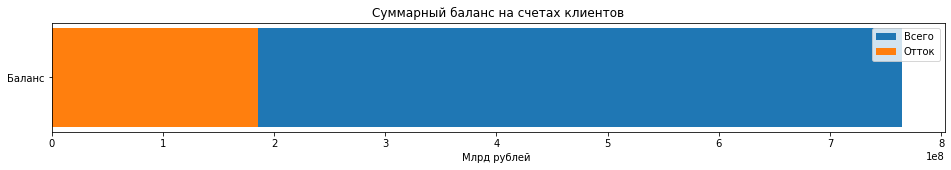

In [77]:
# Построим график суммарного остатка на счетах клиентов с учетом оттока
plt.figure(figsize = (16, 2))
plt.barh(y = 'Баланс', width = users['balance'].sum(), label = 'Всего')
plt.barh(y = 'Баланс', width = churn_group['balance'].sum(), label = 'Отток')
plt.legend()
#plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.029, 0.037])
plt.title('Суммарный баланс на счетах клиентов')
plt.xlabel('Млрд рублей ')
plt.ylabel('')
plt.show()

### Процент ушедших клиентов

In [78]:
churn_perc = len(churn_group) / len(stay_group) * 100
churn_perc = np.round(churn_perc, 2)
print('Процент ушедших клиентов:', churn_perc, '%')

Процент ушедших клиентов: 25.58 %


### Процент активных клиентов

In [79]:
active_perc = users['loyalty'].mean() * 100
active_perc = np.round(active_perc, 2)
print('Процент активных клиентов:', active_perc, '%')

Процент активных клиентов: 51.51 %


### Процент клиентов с кредитной картой

In [80]:
ccard_perc = users['creditcard'].mean() * 100
ccard_perc = np.round(ccard_perc, 2)
print('Процент клиентов c кредитной картой:', ccard_perc, '%')

Процент клиентов c кредитной картой: 70.55 %


## Выводы по метрикам и бизнес-показателям

- Суммарный баланс на счетах всех клиентов: 1 198 898 892.88 рублей
- Суммарный баланс на счетах ушедших клиентов: 245 588 094.63 рублей
- Процент ушедших клиентов: 25.58%
- Процент активных клиентов: 51.51%
- Процент клиентов c кредитной картой: 70.55%

## 6. Выводы

- Портрет лояльного клиента
    - средний возраст - от 30 до 40 лет
    - проживает в Ярославле или Рыбинске
    - баланс на счете от 50 до 200 тыс. рублей
    - пользуется 1 или 2 продуктами
    - имеет кредитную карту
    - имеет несколько объектов в собственности
    - активный клиент


- Портрет клиента с риском оттока
    - возраст от 55 до 65 лет
    - проживает в Ростове Великом
    - не активный
    - пользуется 3 или 4 продуктами
    - не имеет кредитной карты
    - баланс на счете меньше 50 или больше 200 тыс. рублей

## 7. Рекомендации по удержанию клиентов

В результате анализа выявлено, что признаками, которые влияют на отток клиентов из банка являются:
- активность
- пол (женщин ушло больше чем мужчин)
- возрастная категория (очень большой отток в сегментах от 40 до 65 лет)
- город (в Ростове Великом отток больше чем в других городах)
- число продуктов (клиенты с большим числом продуктов склонны к оттоку)

В связи с этим, для удержания клиентов рекомендуется:
- повышать активность клиентов
    - чаще пользоваться кредитной картой, например, получая cashback
    - чаще совершать операции по счетам и вкладам
    - оформлять дополнительные карты на членов семьи
- предложить тематические продукты с привлекательными условиями для женщин
- проанализировать чем недовольны клиенты из города Ростов Великий
- предложить особые продукты для клиентов 40-65 лет
- сделать опрос клиентов, которые пользуются 3-4 продуктами банка, чем они недовольны